In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv("/pasteurizer_3.csv") 

In [12]:
print(df.count())
print('[A] \n', df['MIXA_PASTEUR_STATE'].value_counts())
print('[B] \n', df['MIXB_PASTEUR_STATE'].value_counts())


INDEX                 86092
STD_DT                86091
MIXA_PASTEUR_STATE     5339
MIXB_PASTEUR_STATE     5612
MIXA_PASTEUR_TEMP     86091
MIXB_PASTEUR_TEMP     86091
INSP                  86091
dtype: int64
[A] 
 0.0    2776
1.0    2563
Name: MIXA_PASTEUR_STATE, dtype: int64
[B] 
 1.0    2834
0.0    2778
Name: MIXB_PASTEUR_STATE, dtype: int64


In [13]:
df[df.isnull().any(axis=1)]

# 인덱스 재정렬(컬럼:1, 행:0)
df.reset_index(drop=True, inplace=True)

df = df.dropna()
df

,INDEX,STD_DT,MIXA_PASTEUR_STATE,MIXB_PASTEUR_STATE,MIXA_PASTEUR_TEMP,MIXB_PASTEUR_TEMP,INSP
0,0,2020-03-04 6:00,1.0,1.0,551.0,524.0,1.0
1,1,2020-03-04 6:30,1.0,1.0,584.0,536.0,1.0
2,2,2020-03-04 7:00,1.0,1.0,584.0,536.0,1.0
3,3,2020-03-04 7:30,1.0,1.0,585.0,536.0,1.0
4,4,2020-03-04 8:00,1.0,1.0,585.0,536.0,1.0
...,...,...,...,...,...,...,...
85954,85954,2020-06-22 8:00,1.0,1.0,656.0,658.0,0.0
85985,85985,2020-06-22 8:30,1.0,1.0,651.0,655.0,0.0
86016,86016,2020-06-22 9:00,1.0,1.0,636.0,641.0,0.0
86047,86047,2020-06-22 9:30,1.0,1.0,610.0,616.0,0.0


In [10]:
X_train, X_test, y_test, y_test = train_test_split(df, test_size=0.3, random_state=121)

ValueError: ignored

In [ ]:
# train data랑 test 데이터 나눔
x_train = df.iloc[:134908, 1:5].values
y_train = df.iloc[:134908, [-1]].values
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)

# train과 test를 8:2 로 나눠서 진행하였는데 모델 과적합이 나와서
# 과적합 잡으려고 validation 값 6:2:2
x_val = df.iloc[134909:168635, 1:5].values
y_val = df.iloc[134909:168635, [-1]].values
print(x_train.shape, y_train.shape)

x_test = df.iloc[168636:, 1:5].values  
y_test = df.iloc[168636:, [-1]].values
x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

print(x_test.shape, y_test.shape)


(134908, 4) (134908, 1)
(42158, 4) (42158, 1)


In [ ]:
x_train.shape[1]

4

In [ ]:
len(x_train)

168635

In [ ]:
# dataset parameters.
nb_classes  = y_train.shape[1]  # 아웃풋 개수 
nb_features = x_train.shape[1] # 뉴런갯수
print(nb_classes, nb_features)

# training HyperParameters
learning_rate  = 0.00001 # 0.01더 곱해봄
batch_size     = 128 # 128
epochs         = 100

# network hyperparameters
n_hidden_1 = 7 # 1st layer number of neurons.
n_hidden_2 = 7 # 2nd layer number of neurons.

n_train = x_train.shape[0] 
n_test  = x_test.shape[0] 

1 4


In [ ]:
model = Sequential()  # 모델선언
model.add(Dense(units = n_hidden_1, activation='sigmoid', input_shape=(nb_features,)))   # neuron, input column개수
model.add(Dense(n_hidden_2, activation='sigmoid'))
model.add(Dense(nb_classes, activation='sigmoid'))   # ouput column개수
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',   # y = not one-hot encoding but number
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1, #출력값 type / default 값은 2
                    validation_data=(x_val, y_val))

Epoch 1/10
1054/1054 [==============================] - 60s 57ms/step - loss: 0.6307 - accuracy: 0.6531 - val_loss: 0.6503 - val_accuracy: 0.5524
Epoch 2/10
1054/1054 [==============================] - 4s 4ms/step - loss: 0.5804 - accuracy: 0.7175 - val_loss: 0.6239 - val_accuracy: 0.7389
Epoch 3/10
1054/1054 [==============================] - 4s 4ms/step - loss: 0.5444 - accuracy: 0.7629 - val_loss: 0.6869 - val_accuracy: 0.7432
Epoch 4/10
1054/1054 [==============================] - 4s 4ms/step - loss: 0.5262 - accuracy: 0.7749 - val_loss: 0.7551 - val_accuracy: 0.7347
Epoch 5/10
1054/1054 [==============================] - 4s 4ms/step - loss: 0.5125 - accuracy: 0.7834 - val_loss: 0.7916 - val_accuracy: 0.7406
Epoch 6/10
1054/1054 [==============================] - 4s 4ms/step - loss: 0.4979 - accuracy: 0.7926 - val_loss: 0.8179 - val_accuracy: 0.7545
Epoch 7/10
1054/1054 [==============================] - 4s 4ms/step - loss: 0.4814 - accuracy: 0.8030 - val_loss: 0.8535 - val_accurac

In [ ]:
y_pred = model.predict(x_test)

1318/1318 [==============================] - 2s 1ms/step


In [ ]:
y_pred

array([[0.28343153],
       [0.28343153],
       [0.28343153],
       ...,
       [0.999997  ],
       [0.999997  ],
       [0.999997  ]], dtype=float32)

In [ ]:
y_pr = []
for i in y_pred:
  if i >= 0.5:
    y_pr.append(1)
  else:
    y_pr.append(0)

In [ ]:
y_pr = np.asarray(y_pr)

In [ ]:
# 정확도 출력
acc = accuracy_score(y_test, y_pr)
print('accuracy_score : ',acc)

accuracy_score :  0.7253427581953603


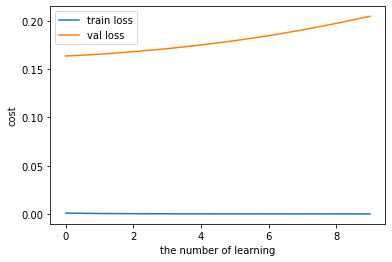

In [ ]:
# 5. 모델 학습 과정 표시하기
plt.plot(history.history['loss'],     label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.xlabel('the number of learning')
plt.ylabel('cost')
plt.legend()
plt.show()